In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld

dir_data = "C:\\Users\\nicol\\Data\\data.gouv.fr\\"

# Véhicules immatriculés impliqués dans les accidents corporels - 2009 à 2021
df_vehic_immat = ld.load_vehic_immat(folder_path=dir_data, start_year=2009, end_year=2021)

# Caractéristiques
df_caract = ld.load_caract(folder_path=dir_data, start_year=2005, end_year=2021)

# Lieux
df_lieux = ld.load_lieux(folder_path=dir_data, start_year=2005, end_year=2021)

# Usagers
df_usagers = ld.load_usagers(folder_path=dir_data, start_year=2005, end_year=2021)

# Véhicules
df_vehic = ld.load_vehicules(folder_path=dir_data, start_year=2005, end_year=2021)


C:\Users\nicol\git\projet-accidents-routiers\load_data.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vehic[2009] = pd.read_csv(folder_path + '2009.csv', sep=';')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:168: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2016] = pd.read_csv(folder_path + 'lieux_2016.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:170: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2017] = pd.read_csv(folder_path + 'lieux-2017.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:172: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2018] = pd.read_csv(folder_path + 'lieux-2018.csv', sep=',')


Usagers - Dimension des données selon les années : 

usagers 2018 : (130169, 12)
usagers 2019 : (132977, 15)
usagers 2020 : (105295, 15)
usagers 2021 : (129153, 15)

Usagers - Variables selon les années : 

usagers 2018 : ['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh']
usagers 2019 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2020 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2021 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']

Usagers - Modalités de la variable grav : 

usagers 2018 : 1    54248
4    50360
3    22169
2     3392
Name: grav, dtype: int64
usagers 2019 : 1    55314
4    53307
3    20858
2     3498
Nam

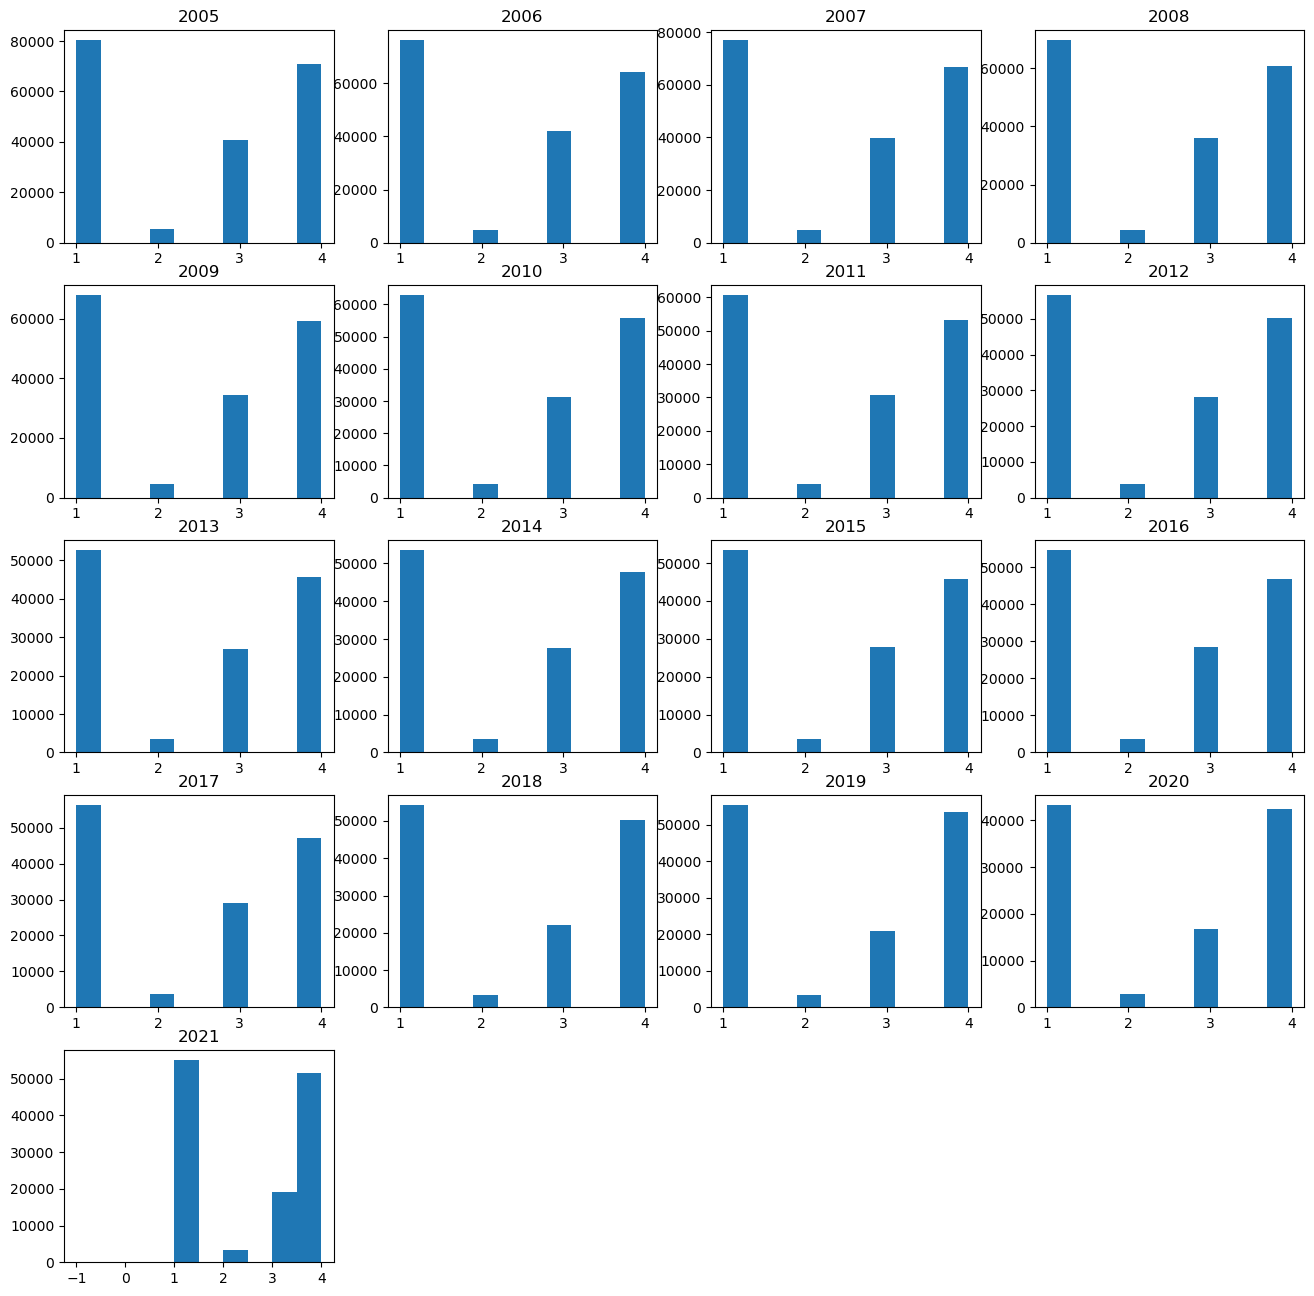

In [2]:
# Etude des fichiers usagers-yyyy.csv

# 1 : Indemne
# 2 : Tué
# 3 : Blessé hospitalisé
# 4 : Blessé léger

print("Usagers - Dimension des données selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year].shape}")

print("\nUsagers - Variables selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {list(usagers[year].columns)}")

print("\nUsagers - Modalités de la variable grav : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year]['grav'].value_counts()}")


plt.figure(figsize=(16, 16))
plt.title('Répartition de la gravité des accidents par année depuis 2005')
for k in range(1, 18):
    year = 2005 + k -1
    plt.subplot(5, 4, k)
    plt.hist(usagers[year].grav);
    plt.title(year)

## Analyse usagers

Help on function load_usagers in module load_data:

load_usagers(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : usagers = load_usagers(2019, 2021)
    les données de l'années 2020 sont accesibles usagers[2020]
    
    Num_Acc : identifiant de l'accident
    id_vehicule : identifiant unique du véhicule repris pour chacun des usagers occupant ce véhicule
    num_veh : identifiant du véhicule repris pour chacun des usagers occupant ce véhicule
    place : permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident
    catu : catégorie d'usager
    grav : gravité de l'accident (!!!VARIABLE CIBLE!!!)
    sexe : sexe de l'usager
    an_nais : année de naissance de l'usager
    trajet : motif du déplacement au moment de l’accident
    secu1 : le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité
    secu2 : le renseignemen

C:\Users\nicol\AppData\Local\Temp\ipykernel_11128\3772891704.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);


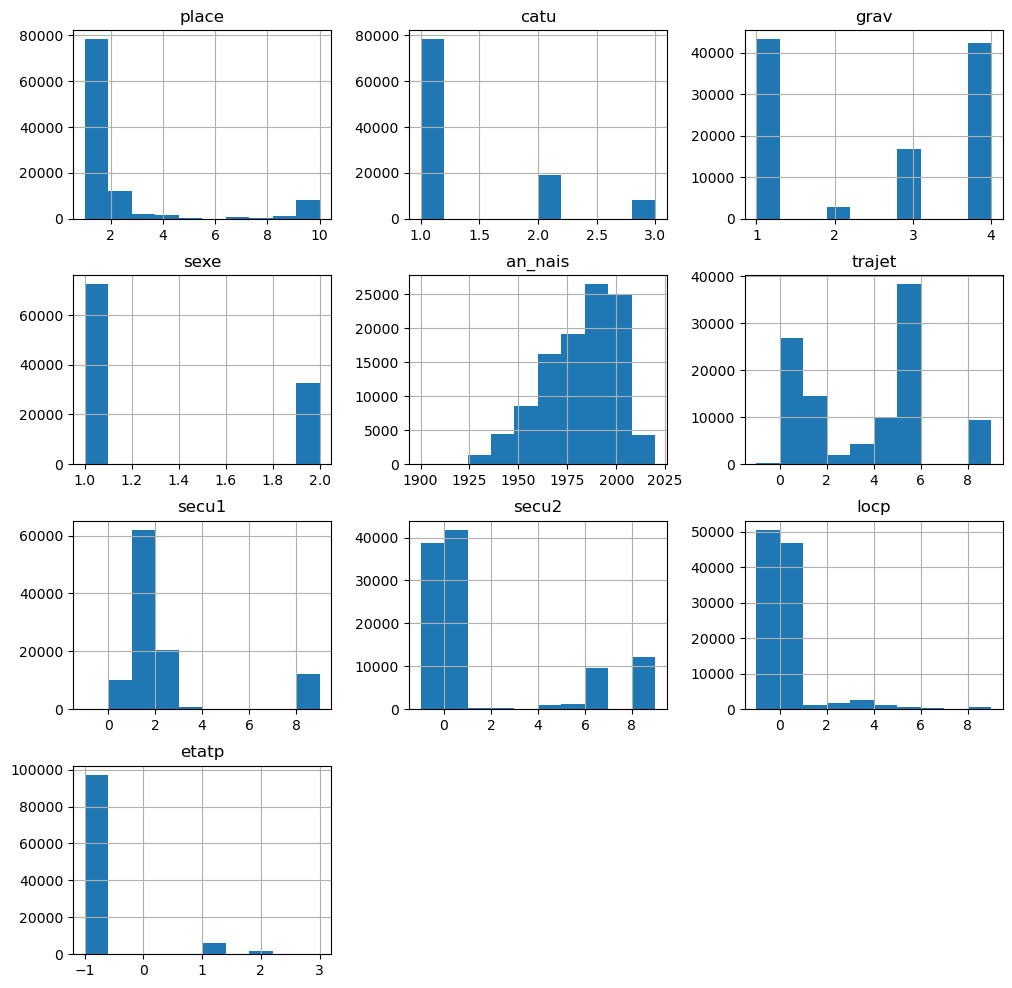

In [3]:
# Analyse rapide des colonnes du fichier usager

help(ld.load_usagers)

df = usagers[2020]
print(list(df.columns))

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);
# conducteur très majoritairement impliqué
# ~70% d'hommes vs ~30% femmes
# pic de jeunes conducteurs
# pics sur promenade et trajets domicile-travail

## Analyse caracteristiques

Help on function load_caract in module load_data:

load_caract(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : caract = load_caract(2019, 2021)
    les données de l'années 2020 sont accessibles caract[2020]
    
    Num_Acc : identifiant de l'accident
    jour : jour de l'accident
    mois : mois de l'accident
    an : année de l'accident
    hrmn : hh:mm de l'accident
    lum : conditions de luminosité (1: Plein jour, ..., 5:Nuit avec éclairage public allumé)
    dep : département (code INSEE)
    com : commune (code INSEE)
    agg : localisation (1: hors agglomération, 2: en agglomération)
    int : intersection (1: Hors intersection, ..., 9: Autre intersection)
    atm : conditions atmosphériques (-1: Non renseigné, 1: Normale, ..., 8: Temps couvert, 9: Autre)
    col : type de collision (-1: Non renseigné, 1:Deux véhicules - frontale, ..., 6: Autre collision, 7: Sans collision)
   

C:\Users\nicol\AppData\Local\Temp\ipykernel_11128\3491644297.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['mois', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col']].hist(ax = ax);


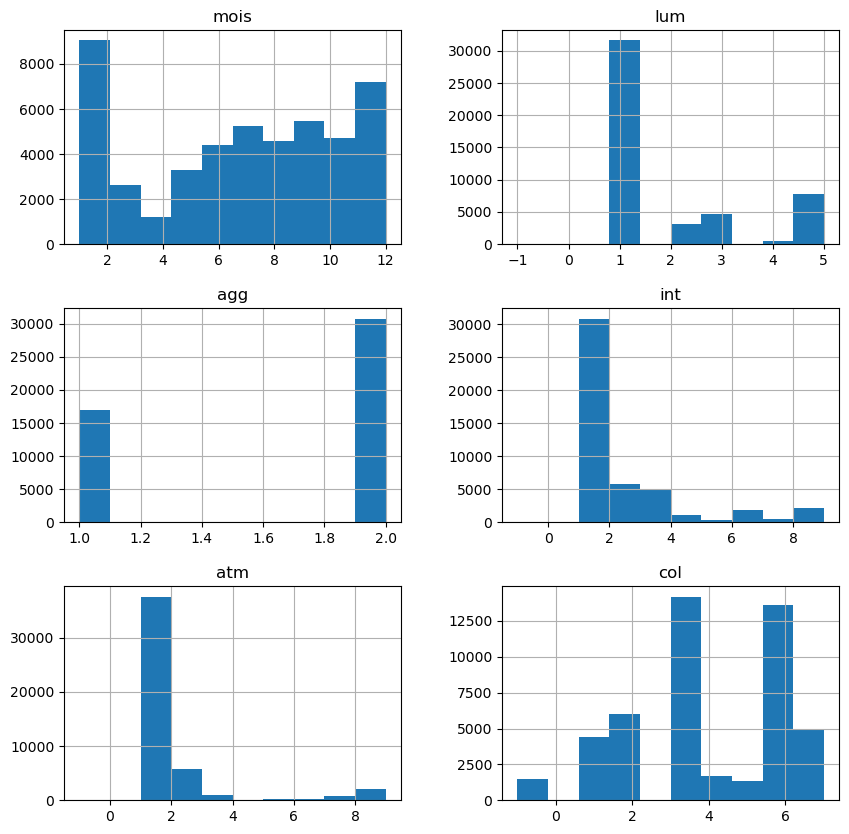

In [4]:
# Analyse rapide des colonnes du fichier caractéristiques

help(ld.load_caract)

df = caract[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['mois', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col']].hist(ax = ax);


## Analyse vehicules

Help on function load_vehicules in module load_data:

load_vehicules(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : vehicles = load_vehicules(2019, 2021)
    les données de l'années 2020 sont accesibles vehicles[2020]
    
    Num_Acc : identifiant de l'accident
    id_vehicule : identifiant du véhicule
    num_veh : identifiant du véhicule repris pour chacun des usagers occupant ce véhicule
    senc : sens de circulation
    catv : catégorie du véhicule
    obs : obstacle fixe heurté
    obsm : obstacle mobile heurté
    choc : point de choc initial
    manv : manoeuvre principale avant l'accident
    motor : type de motorisation du véhicule
    occutc : nombre d’occupants dans le transport en commun

['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']


C:\Users\nicol\AppData\Local\Temp\ipykernel_11128\774778149.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']].hist(ax = ax);


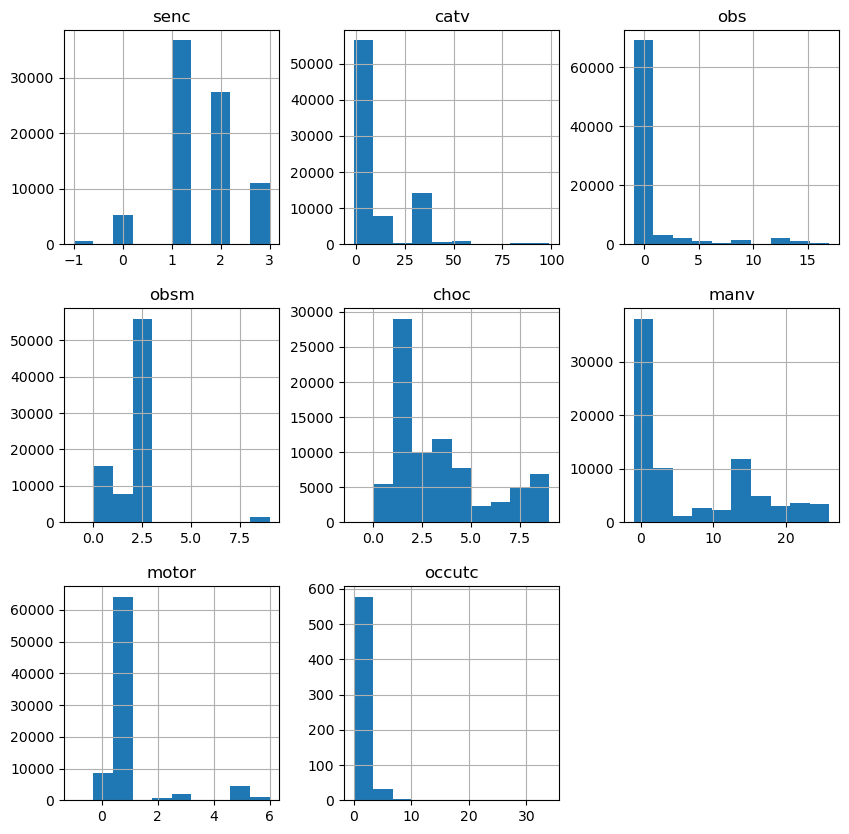

In [5]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_vehicules)

df = vehic[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']].hist(ax = ax);


## Analyse lieux

Help on function load_lieux in module load_data:

load_lieux(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : lieux = load_lieux(2019, 2021)
    les données de l'années 2020 sont accessibles lieux[2020]
    
    Num_Acc : identifiant de l'accident
    catr : catégorie de route
    voie : numéro de la route
    v1 : indice numérique du numéro de route
    v2 : lettre indice alphanumérique de la route
    circ : régime de circulation
    nbv : nombre total de voies de circulation
    vosp : signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie.
    prof : profil en long décrit la déclivité de la route à l'endroit de l'accident
    pr : numéro du PR de rattachement (numéro de la borne amont)
    pr1 : distance en mètres au PR (par rapport à la borne amont)
    plan : tracé en plan ( 1:Partie rectiligne, 2:En courbe à gauche, 3:En cour

C:\Users\nicol\AppData\Local\Temp\ipykernel_11128\3414513707.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma']].hist(ax = ax);


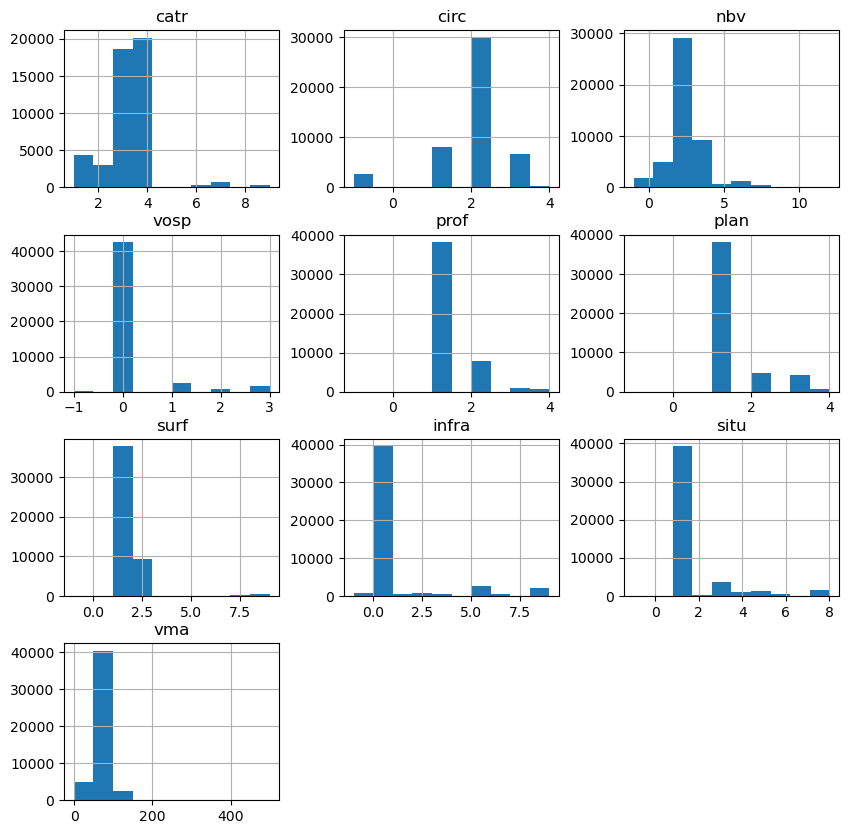

In [6]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_lieux)

df = lieux[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma']].hist(ax = ax);


## Analyse véhicules immat impliqués

Help on function load_vehic_immat in module load_data:

load_vehic_immat(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : vehic = load_vehicles(2019, 2021)
    les données de l'années 2020 sont accessibles vehic[2020]
    
    Id_accident : Numéro d'identifiant de l’accident
    Lettre Conventionnelle Véhicule : Identifiant de chaque véhicule impliqué dans un même accident – Code alpha
    Année : Année de l'accident
    Lieu Admin Actuel - Territoire Nom : 'Métropole', 'DOM', ou 'Autres OM'
    Type Accident - Libellé (old) : accident léger, mortel, ou grave
    CNIT : numéro d’identification national associé à chaque type, variante et version (TVV) de chaque réception communautaire de véhicules
    Catégorie véhicule : Cyclo, Moto légère, moto lourdez, VT, VU, PL, Autres
    Age véhicule : Age du véhicule à partir de la date de 1ère mise en circulation jusqu’à la date de l’accident

[

C:\Users\nicol\AppData\Local\Temp\ipykernel_11128\3680582775.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);


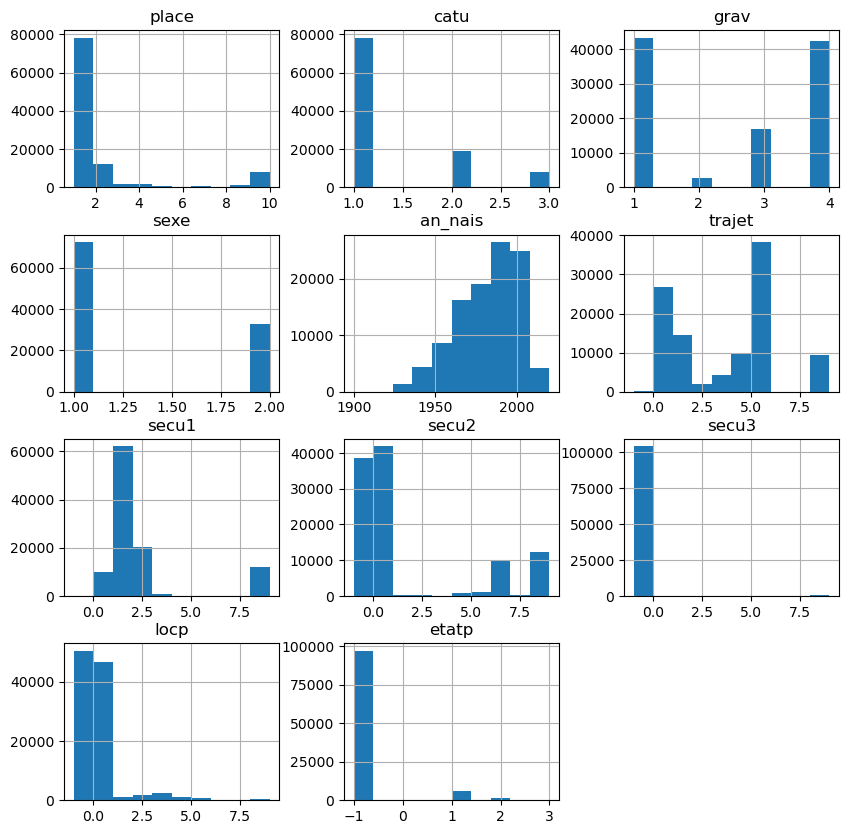

In [7]:
# Analyse rapide des colonnes du fichier dés véhicules immatriculés impliqués

help(ld.load_vehic_immat)

df = vehic_immat[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);


In [8]:
# croisons la gravité de l'accident avec la catégorie de lieu

year = 2021

df_usagers = usagers[year]
df_lieux = lieux[year]

print('usagers : ', df_usagers.columns)
print('lieux : ', df_lieux.columns)

# df_lieux -> que des Num_acc uniques? --> oui si le  résultat suivant est nul
df_lieux.Num_Acc.duplicated().sum()

df_acc_grav = df_usagers[['Num_Acc', 'grav']]
df_lieu_categ = df_lieux[['Num_Acc', 'catr']]

df_acc_grav.groupby(by='Num_Acc').count()

# df_usagers[df_usagers.Num_Acc == 202100000001]

# df_grav_par_lieu = df_acc_grav.merge(on='Num_Acc', right=df_lieu_categ, how='left')
# df_grav_par_lieu
# count_grav_par_lieu = df_grav_par_lieu.groupby(by=['catr', 'grav']).count()
# count_grav_par_lieu
# plt.scatter(df_grav_par_lieu.catr, df_grav_par_lieu.grav)


usagers :  Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp',
       'etatp'],
      dtype='object')
lieux :  Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')


,grav
Num_Acc,
202100000001,2
202100000002,2
202100000003,2
202100000004,2
202100000005,2
...,...
202100056514,1
202100056515,1
202100056516,2


In [9]:
print('df_usagers', df_usagers.columns)
print('df_lieux', df_lieux.columns)
ptint('', df_)




df_usagers Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp',
       'etatp'],
      dtype='object')
df_lieux Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')
